<a href="https://colab.research.google.com/github/afrojaakter/Neural-Computing/blob/main/HopfieldNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1:

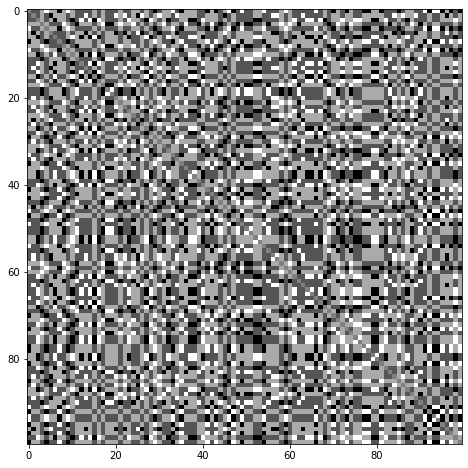

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

N = 100 # Number of Neurons
p = 3 # Number of Patterns

S = 2*np.random.randint(0, 2, (p, N)) - 1 

J = np.dot(S.T, S) - p*np.eye(N, N)
plt.imshow(J, cmap='gray')
plt.show()

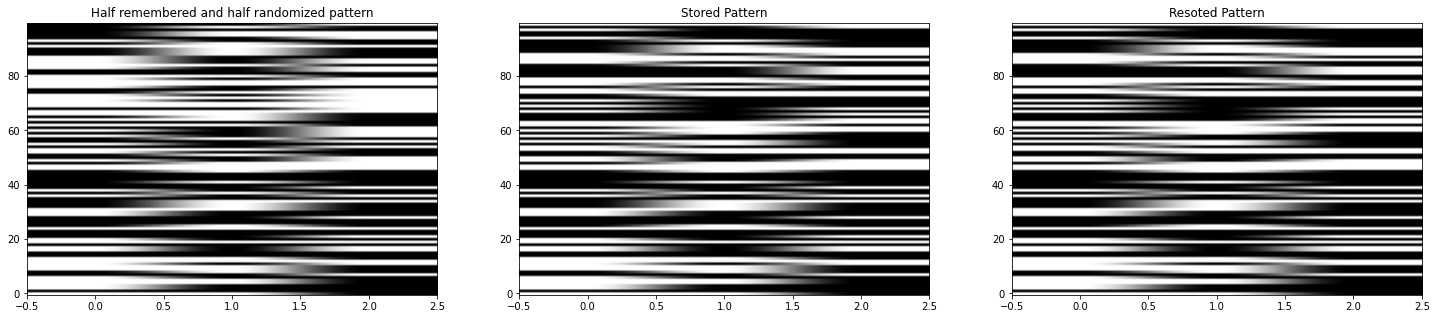

In [318]:
from pylab import imshow, cm, show
from numpy import zeros, outer, diag_indices
from numpy import vectorize, dot
from numpy import array, dot

def display(pattern, N):
    imshow(pattern.reshape((N,N)),cmap=cm.binary, interpolation='nearest')
    show()

def train(patterns):
    r,c = patterns.shape
    W = zeros((c,c))
    for p in patterns:
        W = W + outer(p,p)
    W[diag_indices(c)] = 0
    return W/r

def recall(W, patterns, steps=5):
    sgn = vectorize(lambda x: -1 if x<0 else +1)vote = []
    for _ in range(steps):
        patterns = sgn(dot(patterns,W)) 
        v_t = np.dot(patterns, xsi_mu)
    return patterns

def hopfield_energy(W, patterns):
    return array([-0.5*dot(dot(p.T,W),p) for p in patterns])

S_half = S[:, :int(N/2)]
S_2nd_half = np.random.choice([1, -1], size = (p, N - int(N/2)))  
newS = np.concatenate([S_half, S_2nd_half], axis = 1) #Half remembered and half randomized pattern

W = train(S)
restoredPattern = recall(W, newS)
fig1, axes1 = plt.subplots(1,3, figsize=(25,5))

axes1[0].imshow(newS.T, origin= 'lower', cmap='binary',aspect= 'auto')
axes1[0].set_title('Half remembered and half randomized pattern')

axes1[1].imshow(S.T, origin= 'lower', aspect= 'auto',cmap='binary' )
axes1[1].set_title('Stored Pattern')

axes1[2].imshow(restoredPattern.T, origin= 'lower', aspect= 'auto',cmap='binary')
axes1[2].set_title('Resoted Pattern')
plt.show()

Problem 2:

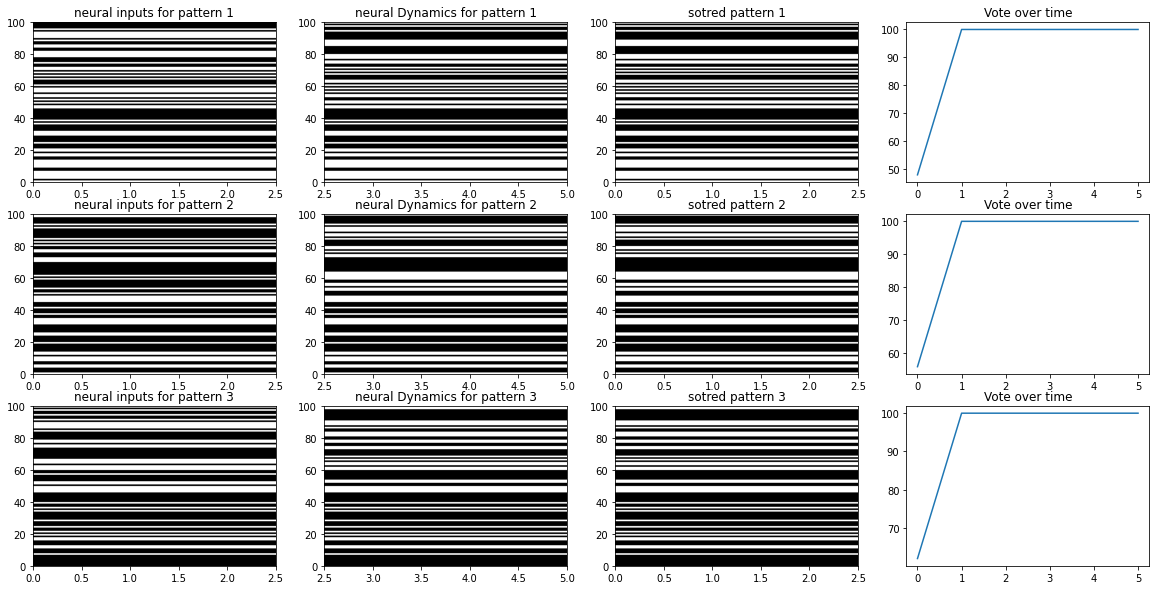

In [317]:
from pylab import imshow, cm, show
from numpy import zeros, outer, inner, diag_indices
from numpy import vectorize, dot
from numpy import array, dot

def display(pattern, N):
    imshow(pattern.reshape((N,N)),cmap=cm.binary, interpolation='nearest')
    show()

def train(patterns):
    r,c = patterns.shape
    W = zeros((c,c))
    for p in patterns:
        W = W + outer(p,p)
    W[diag_indices(c)] = 0
    return W/r

def recall(W, patterns, xsi_mu, steps=5):
    sgn = vectorize(lambda x: -1 if x<0 else +1)
    v_t = [inner(patterns, xsi_mu)]
    for t in range(steps):
        ptrns = sgn(dot(patterns,W)) 
        v_t.append(inner(ptrns, xsi_mu))
    return ptrns, np.array(v_t)


def hopfield_energy(W, patterns):
    return array([-0.5*dot(dot(p.T,W),p) for p in patterns])

S_half = S[:, :int(N/2)]
S_2nd_half = np.random.choice([1, -1], size = (p, N - int(N/2)))  
newS = np.concatenate([S_half, S_2nd_half], axis = 1) #Half remembered and half randomized pattern

W = train(S)

fig, axes = plt.subplots(3,4, figsize=(20,10))

for i, row in zip(range(p), axes):
  half_random_patrn = np.zeros((N))
  half_random_patrn[: int(N/2)] = S[i, :int(N/2)]
  half_random_patrn[int(N/2):] = np.random.choice([1, -1], size = (1, N - int(N/2)))
  Pattern,v_t= recall(W, half_random_patrn, S[i])

  row[0].imshow(half_random_patrn.reshape(-1, 1), origin= 'lower', cmap='binary',extent=[0, 2.5,0,N], aspect='auto') #Inputs
  row[0].set_title('neural inputs for pattern {}'.format(i+1))

  row[1].imshow(Pattern.reshape(-1,1), origin= 'lower', cmap='binary',extent=[2.5, 5,0,N],aspect='auto')  #restored pattern
  row[1].set_title('neural Dynamics for pattern {}'.format(i+1))

  row[2].imshow(S[i].reshape(-1, 1), origin= 'lower', cmap='binary',extent=[0, 2.5,0,N],  aspect='auto')  #stored pattern
  row[2].set_title('sotred pattern {}'.format(i+1))

  row[3].plot(v_t)
  row[3].set_title('Vote over time') 
plt.show()


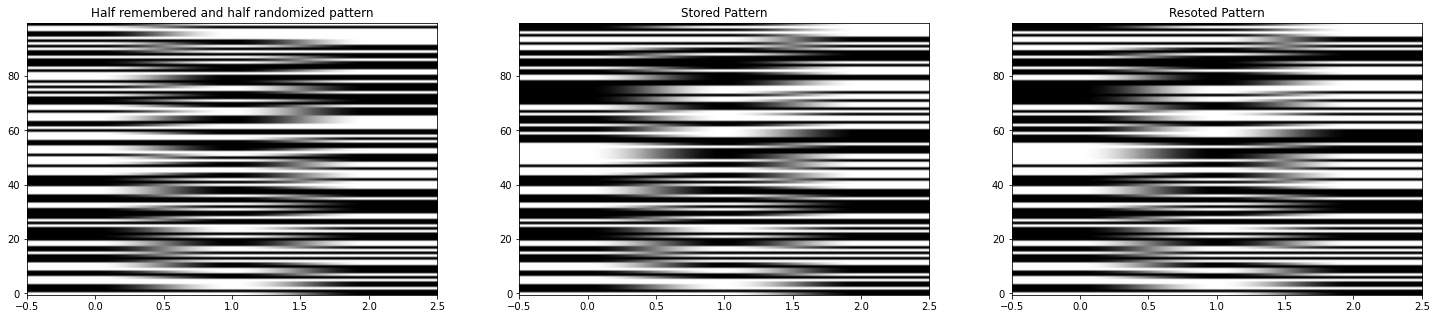

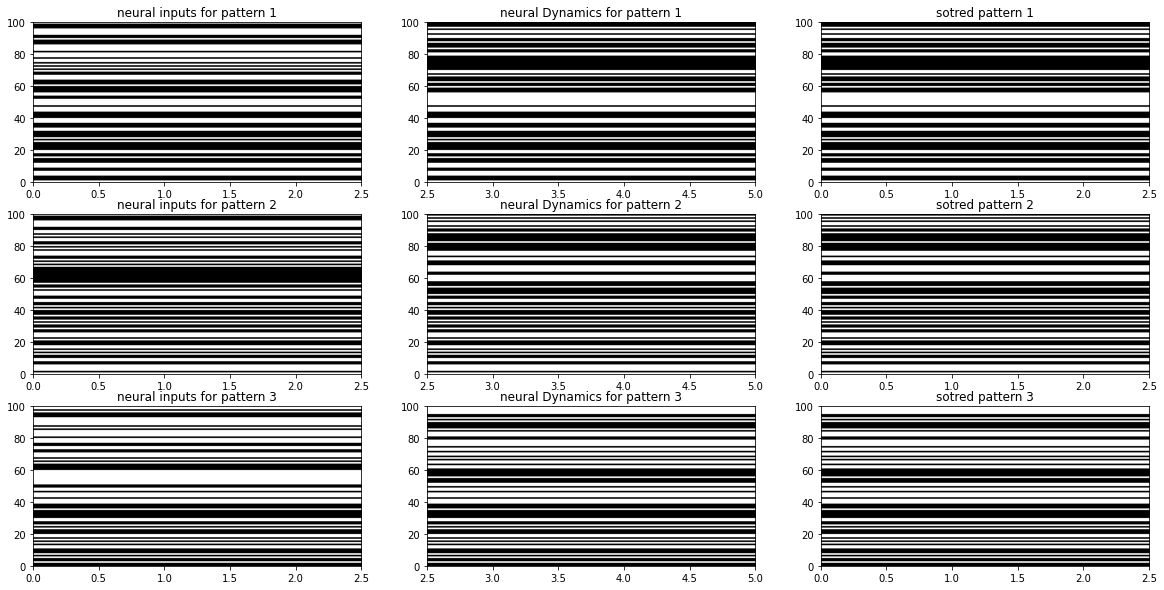

In [5]:
from pylab import imshow, cm, show
from numpy import zeros, outer, diag_indices
from numpy import vectorize, dot
from numpy import array, dot

def display(pattern, N):
    imshow(pattern.reshape((N,N)),cmap=cm.binary, interpolation='nearest')
    show()

def train(patterns):
    r,c = patterns.shape
    W = zeros((c,c))
    for p in patterns:
        W = W + outer(p,p)
    W[diag_indices(c)] = 0
    return W/r

def recall(W, patterns, steps=5):
    sgn = vectorize(lambda x: -1 if x<0 else +1)
    vote = []
    for _ in range(steps):
        patterns = sgn(dot(patterns,W)) 
        xsi_mu = [W[i] for i in range(len(W))]
        v_t = np.dot(patterns, xsi_mu)
    return patterns

def hopfield_energy(W, patterns):
    return array([-0.5*dot(dot(p.T,W),p) for p in patterns])

S_half = S[:, :int(N/2)]
S_2nd_half = np.random.choice([1, -1], size = (p, N - int(N/2)))  
newS = np.concatenate([S_half, S_2nd_half], axis = 1) #Half remembered and half randomized pattern

W = train(S)
restoredPattern = recall(W, newS)
fig1, axes1 = plt.subplots(1,3, figsize=(25,5))

axes1[0].imshow(newS.T, origin= 'lower', cmap='binary',aspect= 'auto')
axes1[0].set_title('Half remembered and half randomized pattern')

axes1[1].imshow(S.T, origin= 'lower', aspect= 'auto',cmap='binary' )
axes1[1].set_title('Stored Pattern')

axes1[2].imshow(restoredPattern.T, origin= 'lower', aspect= 'auto',cmap='binary')
axes1[2].set_title('Resoted Pattern')
plt.show()

fig, axes = plt.subplots(3,3, figsize=(20,10))
for i, row in zip(range(p), axes):
  half_random_patrn = np.zeros((N))
  half_random_patrn[: int(N/2)] = S[i, :int(N/2)]
  half_random_patrn[int(N/2):] = np.random.choice([1, -1], size = (1, N - int(N/2)))
  Pattern = recall(W, half_random_patrn)
  
  row[0].imshow(half_random_patrn.reshape(-1, 1), origin= 'lower', cmap='binary',extent=[0, 2.5,0,N], aspect='auto') #Inputs
  row[0].set_title('neural inputs for pattern {}'.format(i+1))

  row[1].imshow(Pattern.reshape(-1, 1), origin= 'lower', cmap='binary',extent=[2.5, 5,0,N],aspect='auto')  #restored pattern
  row[1].set_title('neural Dynamics for pattern {}'.format(i+1))

  row[2].imshow(S[i].reshape(-1, 1), origin= 'lower', cmap='binary',extent=[0, 2.5,0,N],  aspect='auto')  #stored pattern
  row[2].set_title('sotred pattern {}'.format(i+1))

plt.show()


Problem 3:

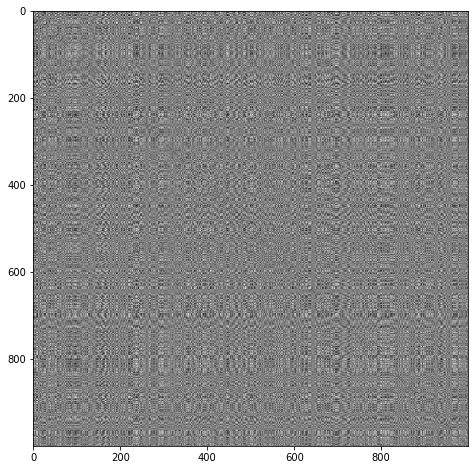

In [123]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

N = 1000 # Number of Neurons
p = 100 # Number of Patterns

S = 2*np.random.randint(0, 2, (p, N)) - 1 
J = np.dot(S.T, S) - p*np.eye(N, N)
plt.imshow(J, cmap='gray')
plt.show()


In [126]:
def error(v1, v2, N):  
  err = min(np.sum(abs(v1-v2)), np.sum(abs(v1+v2)))/(2*N)
  return err

def recall(W, patterns,xsi, steps=100):
    sgn = vectorize(lambda x: -1 if x<0 else +1)
    for t in range(steps):
        patterns = sgn(dot(patterns,W)) 
    return patterns

Error_random = []
Error_hopfield = []
for i in range(p):
  new_patrn = np.random.choice([1, -1], size = (1, N))

  half_random_patrn = np.zeros((N))
  half_random_patrn[: int(N/2)] = S[i, :int(N/2)]
  half_random_patrn[int(N/2):] = np.random.choice([1, -1], size = (1, N - int(N/2)))
  random_Pattern = recall(J, new_patrn, S[i])
  hopfield_Pattern = recall(J, half_random_patrn, S[i])
  
  err_random = error(random_Pattern, S[i], N)
  err_hopfield = error(hopfield_Pattern, S[i], N)
  Error_random.append(err_random)
  Error_hopfield.append(err_hopfield)

plt.figure()  
plt.plot(Error_random, label = 'Random_erro')
plt.plot(Error_hopfield, label = 'Hopfield_error')
plt.xlabel('Pattern')
plt.ylabel('Error')
plt.legend()
plt.show()

IndexError: ignored

Application:

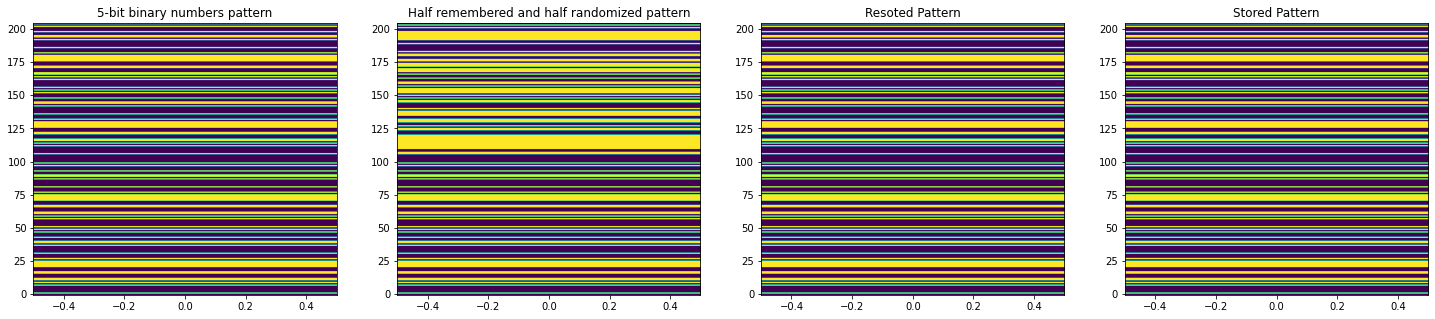

In [116]:
s = 'hellotherehellothere hellotherehellothere'
def makePattern(s):
  bits = ""
  for c in s:
    b = '00000'
    if c != ' ':
      b = bin(ord(c)-96)[2:].rjust(5,'0')
    bits = bits + b

  pattern = []
  for b in bits:
    pattern.append(2*int(b)-1)
  return np.array(pattern)

def recall(W, patterns, steps=5):
    sgn = vectorize(lambda x: -1 if x<0 else +1)
    for _ in range(steps):
        patterns = sgn(dot(patterns,W)) 
    return np.array(patterns)

patterns = makePattern(s)


N = patterns.shape[0]
W = outer(patterns, patterns) - np.eye(N, N)
half_random_patrn = np.zeros((N))
half_random_patrn[: int(N/2)] = patterns[:int(N/2)]
half_random_patrn[int(N/2):] = np.random.choice([1, -1], size = (1, N - int(N/2)))

restoredPattern = recall(W, half_random_patrn)
fig1, axes1 = plt.subplots(1,4, figsize=(25,5))

axes1[0].imshow(patterns.reshape(-1, 1), origin= 'lower', aspect= 'auto')
axes1[0].set_title('5-bit binary numbers pattern')

axes1[1].imshow(half_random_patrn.reshape(-1, 1), origin= 'lower', aspect= 'auto')
axes1[1].set_title('Half remembered and half randomized pattern')

axes1[2].imshow(restoredPattern.reshape(-1, 1), origin= 'lower', aspect= 'auto')
axes1[2].set_title('Resoted Pattern')

axes1[3].imshow(patterns.reshape(-1, 1), origin= 'lower', aspect= 'auto' )
axes1[3].set_title('Stored Pattern')
plt.show()
